# Import Libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

# Load The Dataset

In [37]:
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# Save As A Pandas Dataframe

In [38]:
df = pd.DataFrame(mpg)
df 


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# Box Plot To Show Outliers

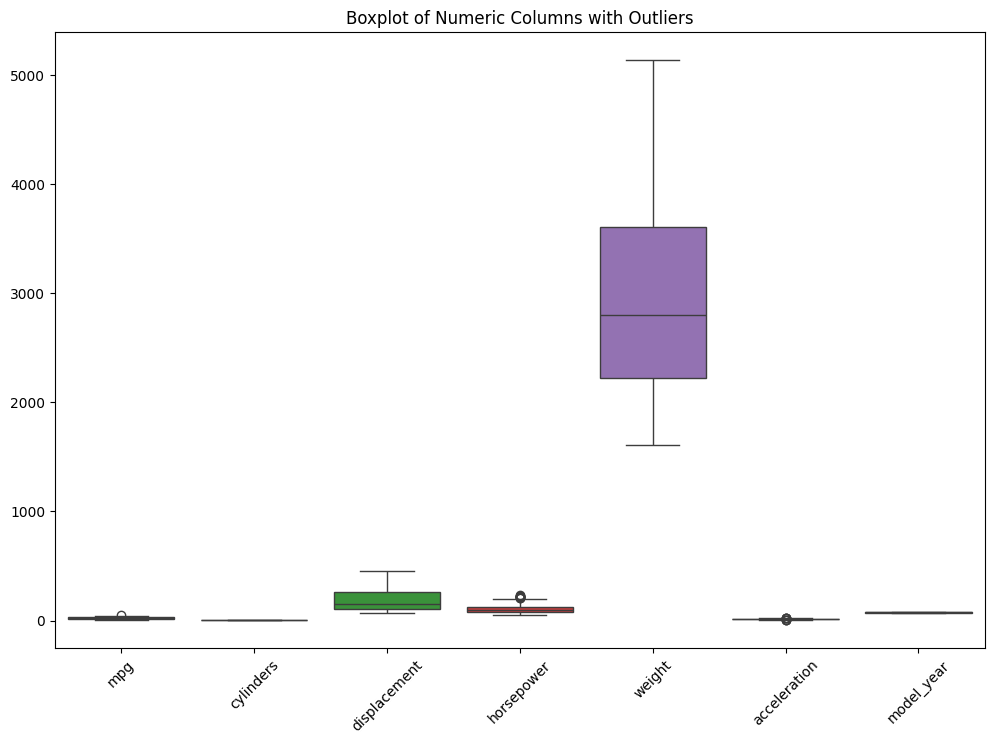

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numeric Columns with Outliers')
plt.xticks(rotation=45)
plt.show()

# Check For Missing Values

In [40]:
print(df.isnull())

       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
393  False      False         False       False   False         False   
394  False      False         False       False   False         False   
395  False      False         False       False   False         False   
396  False      False         False       False   False         False   
397  False      False         False       False   False         False   

     model_year  origin   name  
0         False   False  False  
1         False   False  False  
2         False   False 

# Find The Missing Values

In [41]:
missing_values = df.isnull()
missing_values
missing_counts = missing_values.sum()
missing_percentages = (missing_counts / len(df)) * 100

print("Number of missing values in column")
print (missing_counts)
print("Percentage of missing values in column")
missing_percentages

Number of missing values in column
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
Percentage of missing values in column


mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

# Fill In Missing Values

## Only 1.5% of horsepower values are missing ............

# Check For Duplicates

## Search for rows which are duplicates of already existing rows

In [42]:
duplicates = df.duplicated()
duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


# Rename Columns

## For better clarity and readability the column headers are changed

In [43]:
df.rename(columns={'mpg': 'MPG'}, inplace=True)
df.rename(columns={'cylinders': 'Cylinders'}, inplace=True)
df.rename(columns={'displacement': 'Displacement'}, inplace=True)
df.rename(columns={'horsepower': 'Horsepower'}, inplace=True)
df.rename(columns={'weight': 'Weight'}, inplace=True)
df.rename(columns={'acceleration': 'Acceleration'}, inplace=True)
df.rename(columns={'model_year': 'Model Year'}, inplace=True)
df.rename(columns={'origin': 'Origin'}, inplace=True)
df.rename(columns={'name': 'Name'}, inplace=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# Descriptive Statistics

In [44]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Insights

### Fuel Efficiency Analysis

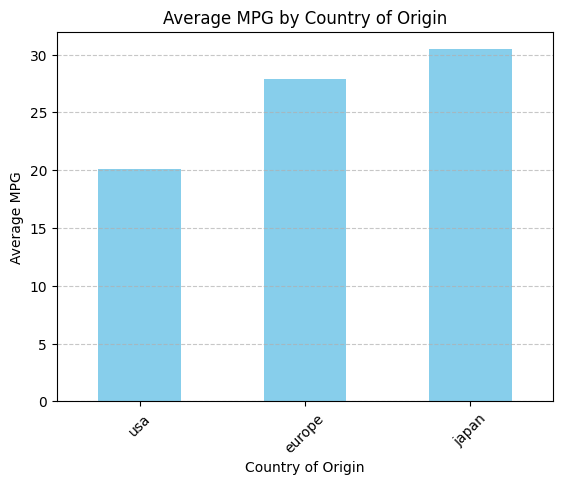

<Figure size 1000x600 with 0 Axes>

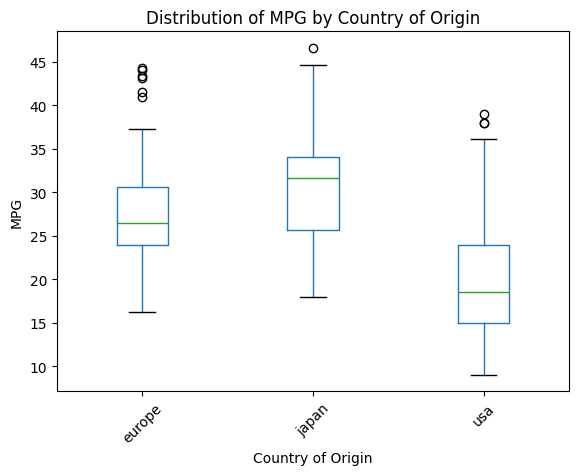

In [45]:
avg_mpg_by_origin = df.groupby('Origin')['MPG'].mean().sort_values()

avg_mpg_by_origin.plot(kind='bar', color='skyblue')
plt.title('Average MPG by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Average MPG')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
df.boxplot(column='MPG', by='Origin', grid=False)
plt.title('Distribution of MPG by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('MPG')
plt.xticks(rotation=45)
plt.suptitle('')
plt.show()

### Engine Characteristics

### Investigate the relationship between displacement, horsepower, and MPG.

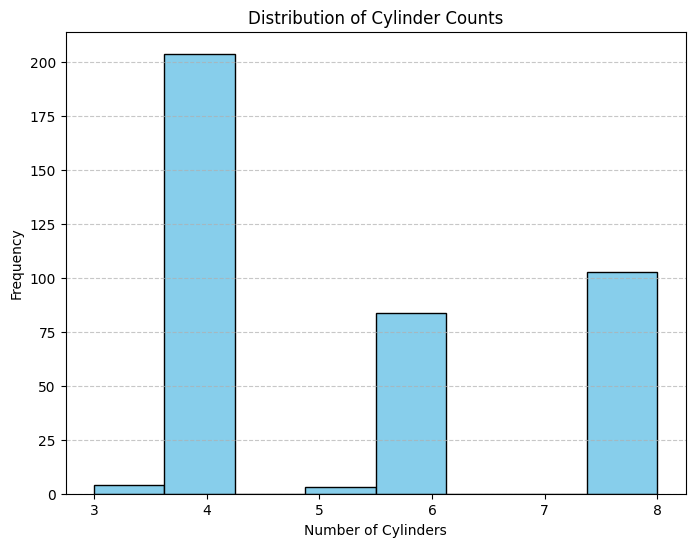

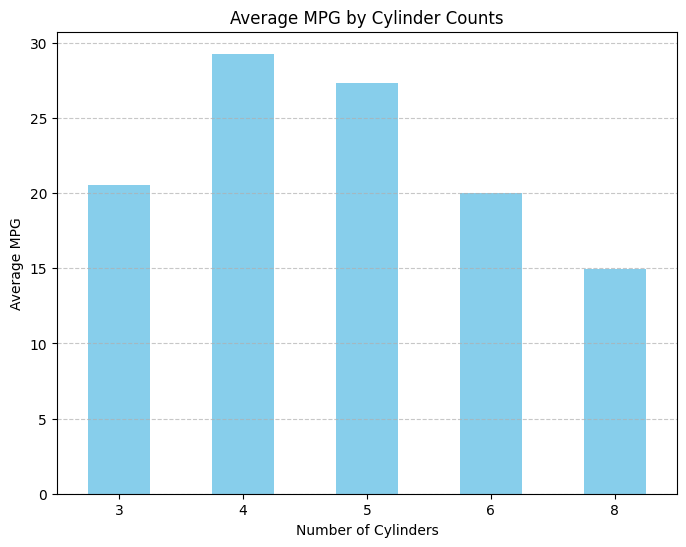

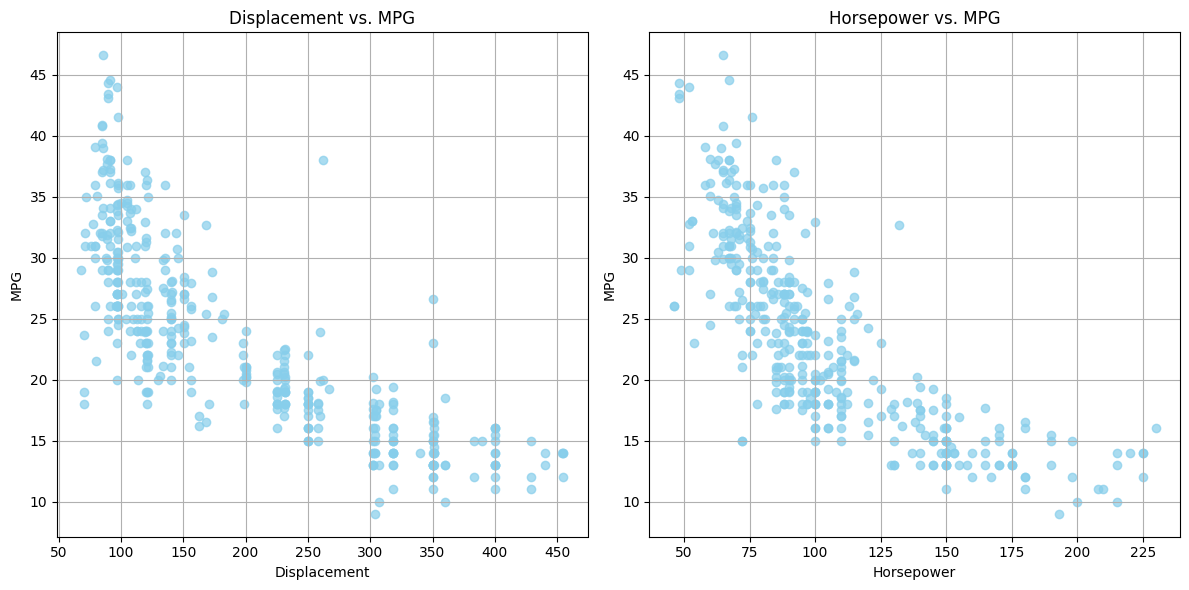

In [46]:

plt.figure(figsize=(8, 6))
df['Cylinders'].plot(kind='hist', bins=8, color='skyblue', edgecolor='black')
plt.title('Distribution of Cylinder Counts')
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


avg_mpg_by_cylinders = df.groupby('Cylinders')['MPG'].mean()
plt.figure(figsize=(8, 6))
avg_mpg_by_cylinders.plot(kind='bar', color='skyblue')
plt.title('Average MPG by Cylinder Counts')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['Displacement'], df['MPG'], color='skyblue', alpha=0.7)
plt.title('Displacement vs. MPG')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['Horsepower'], df['MPG'], color='skyblue', alpha=0.7)
plt.title('Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)

plt.tight_layout()
plt.show()

### Weight vs. Acceleration

Visualize the relationship between weight and acceleration using scatter plots.

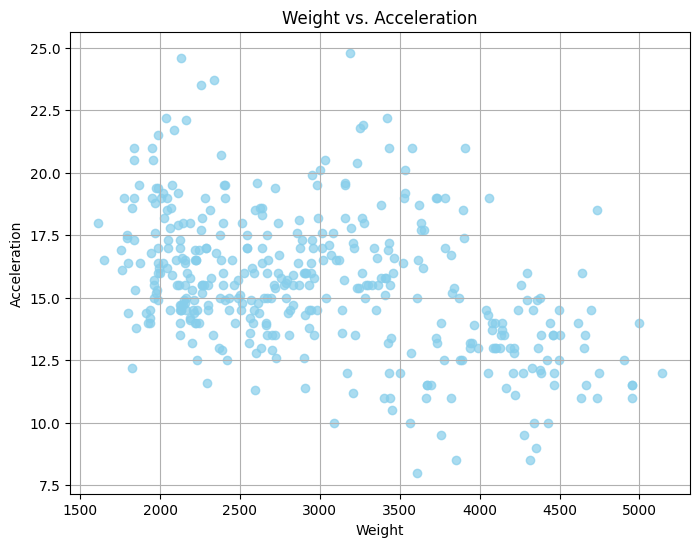

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Weight'], df['Acceleration'], color='skyblue', alpha=0.7)
plt.title('Weight vs. Acceleration')
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.grid(True)
plt.show()

### Model Year Trends

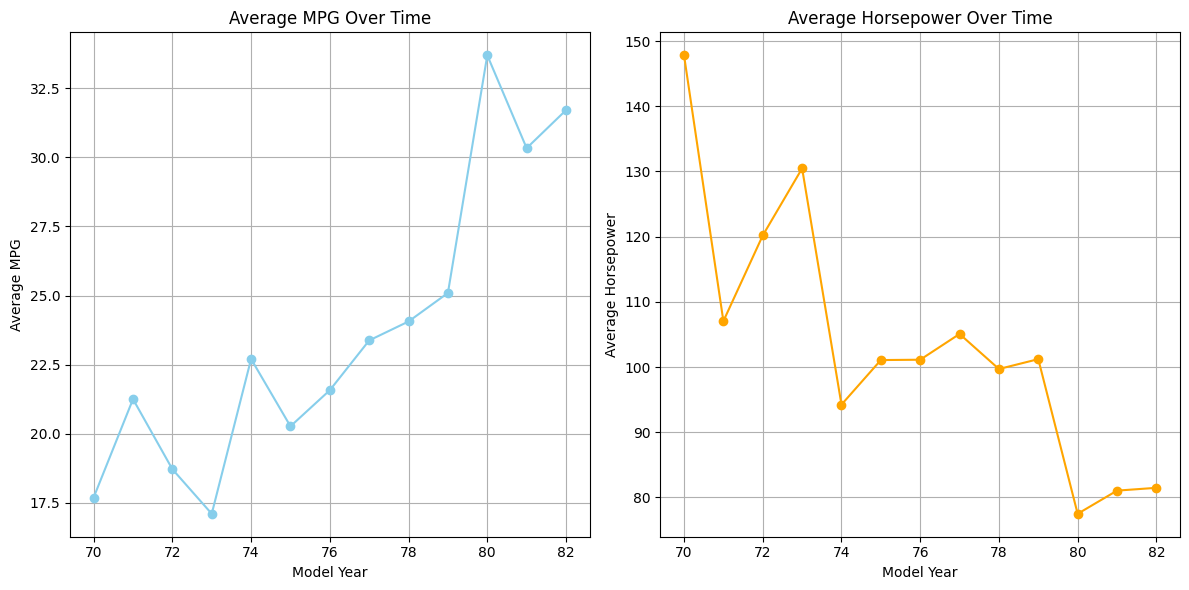

In [48]:
df['MPG'] = pd.to_numeric(df['MPG'], errors='coerce')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

avg_values_by_year = df.groupby('Model Year').agg({'MPG': 'mean', 'Horsepower': 'mean'})

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(avg_values_by_year.index, avg_values_by_year['MPG'], marker='o', color='skyblue')
plt.title('Average MPG Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(avg_values_by_year.index, avg_values_by_year['Horsepower'], marker='o', color='orange')
plt.title('Average Horsepower Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average Horsepower')
plt.grid(True)

plt.tight_layout()
plt.show()

### Country Comparison

In [49]:

numeric_columns = ['MPG', 'Horsepower', 'Weight']
avg_values_by_country = df.groupby('Origin')[numeric_columns].mean()

avg_values_by_country


,MPG,Horsepower,Weight
Origin,,,
europe,27.891429,80.558824,2423.300000
japan,30.450633,79.835443,2221.227848
usa,20.083534,119.048980,3361.931727


### Popular Car Models

In [50]:
popular_models = df['Name'].value_counts().head(10)

popular_models_info = df[df['Name'].isin(popular_models.index)]
popular_models

Name
ford pinto            6
toyota corolla        5
amc matador           5
ford maverick         5
chevrolet chevette    4
amc gremlin           4
chevrolet impala      4
peugeot 504           4
amc hornet            4
toyota corona         4
Name: count, dtype: int64

### Outlier Detection

In [51]:
outliers = df[(np.abs(zscore(df[['MPG', 'Horsepower', 'Weight']])) > 3).any(axis=1)]
outliers

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Name


### Origin vs. MPG

In [52]:
mpg_comparison = df.groupby('Origin')['MPG'].mean()
mpg_comparison

Origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: MPG, dtype: float64

### Correlation Analysis

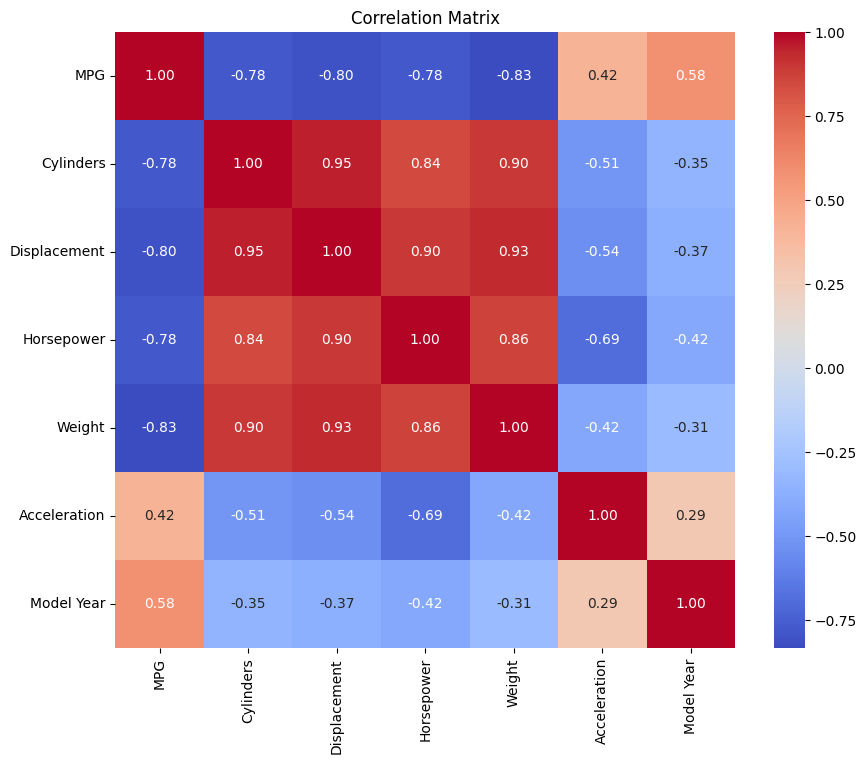

In [53]:

numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
